# Mesurer la somme totale et la cross-entropie des gaussiennes

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import torch

In [30]:
height = 100
width = 100

In [31]:
def gaussian(x,y, x_center, y_center, sigma):

  numerator = (x-x_center)*(x-x_center)+(y-y_center)*(y-y_center)
  denominator = 2*sigma*sigma
  return -numerator/denominator

def display_gaussian_image(center, sigma, reduction=None):

  data = np.zeros((height, width))

  data_X = []

  for k in range(len(center)):
    new = np.exp([[gaussian(i, j, center[k][0], center[k][1], sigma) for i in range(width)] for j in range(height)])
    data += new
    data_X.append(new)

  if reduction == 'minimum_1':
    data = np.minimum(data, 1)
  elif reduction == 'maximum_elementwise':
    data = np.maximum.reduce(data_X)
  elif reduction == 'logplus':
    data = np.log(1 + np.exp(data))

  ax = sns.heatmap(data)

  plt.show()

  return data

### Création d'un masque binaire de vérité-terrain

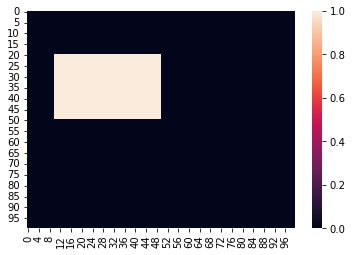

In [38]:
mask_gt = np.zeros((height, width))

for i in range(20, 50):
    for j in range(10, 50):
        mask_gt[i][j] = 1

ax = sns.heatmap(mask_gt)

plt.show()

mask_gt_tensor = torch.from_numpy(mask_gt)

BCEloss = torch.nn.BCELoss()

## Gaussiennes simples additionnées

### Est-ce que les gaussiennes sont égales quand on les bougent de moins de 1 ?

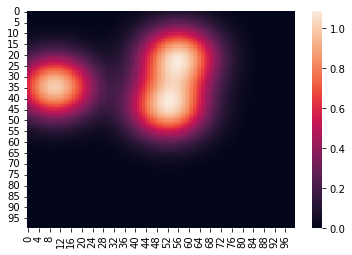

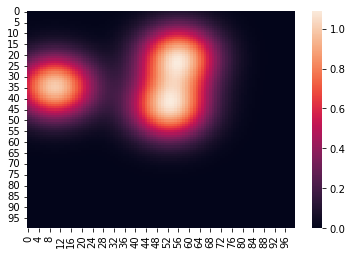

Les deux images sont égales:  False
Somme graphe 1: 1782.721510025803
Somme graphe 2: 1782.7213590069848
BCE graphe 1: tensor(18.8920, dtype=torch.float64)
BCE graphe 2: tensor(19.0278, dtype=torch.float64)


In [41]:
center = [(56,21), (10,34.5), (52.3, 43.8)]
sigma = 10

data1 = display_gaussian_image(center, sigma)

center = [(56,21), (10,34.5), (52.7, 43.8)]

data2 = display_gaussian_image(center, sigma)

print("Les deux images sont égales: ", np.array_equal(data1,data2))

print("Somme graphe 1:", np.sum(data1))
print("Somme graphe 2:", np.sum(data2))

print("BCE graphe 1:", BCEloss(mask_gt_tensor, torch.from_numpy(data1)))
print("BCE graphe 2:", BCEloss(mask_gt_tensor, torch.from_numpy(data2)))

## Gaussiennes plafonnées à 1

### Est-ce que les gaussiennes sont égales quand on les bougent de moins de 1 ?

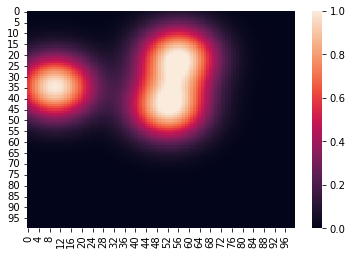

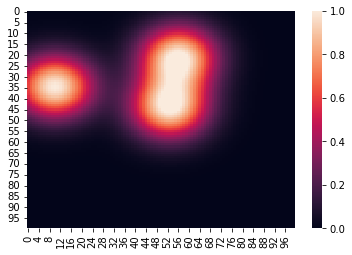

Les deux images sont égales:  False
Somme graphe 1: 1774.8612231956108
Somme graphe 2: 1774.5256772965215
BCE graphe 1: tensor(18.8147, dtype=torch.float64)
BCE graphe 2: tensor(18.9461, dtype=torch.float64)


In [42]:
center = [(56,21), (10,34.5), (52.3, 43.8)]
sigma = 10

data1 = display_gaussian_image(center, sigma, "minimum_1")

center = [(56,21), (10,34.5), (52.7, 43.8)]

data2 = display_gaussian_image(center, sigma, "minimum_1")

print("Les deux images sont égales: ", np.array_equal(data1,data2))

print("Somme graphe 1:", np.sum(data1))
print("Somme graphe 2:", np.sum(data2))

print("BCE graphe 1:", BCEloss(mask_gt_tensor, torch.from_numpy(data1)))
print("BCE graphe 2:", BCEloss(mask_gt_tensor, torch.from_numpy(data2)))

## Gaussiennes avec un maximum par élément

### Est-ce que les gaussiennes sont égales quand on les bougent de moins de 1 ?

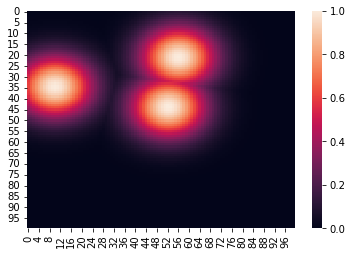

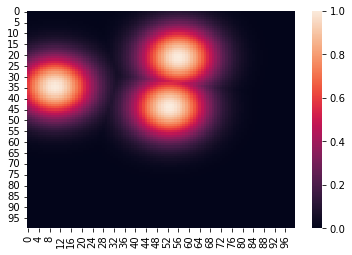

Les deux images sont égales:  False
Somme graphe 1: 1604.903287304931
Somme graphe 2: 1604.9149315494858
BCE graphe 1: tensor(18.4083, dtype=torch.float64)
BCE graphe 2: tensor(18.5157, dtype=torch.float64)


In [45]:
center = [(56,21), (10,34.5), (52.3, 43.8)]
sigma = 10

data1 = display_gaussian_image(center, sigma, "maximum_elementwise")

center = [(56,21), (10,34.5), (52.7, 43.8)]

data2 = display_gaussian_image(center, sigma, "maximum_elementwise")

print("Les deux images sont égales: ", np.array_equal(data1,data2))

print("Somme graphe 1:", np.sum(data1))
print("Somme graphe 2:", np.sum(data2))

print("BCE graphe 1:", BCEloss(mask_gt_tensor, torch.from_numpy(data1)))
print("BCE graphe 2:", BCEloss(mask_gt_tensor, torch.from_numpy(data2)))

## Gaussiennes avec $log+$ ie. $log(1+e^x)$

### Est-ce que les gaussiennes sont égales quand on les bougent de moins de 1 ?

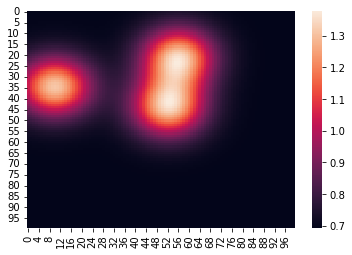

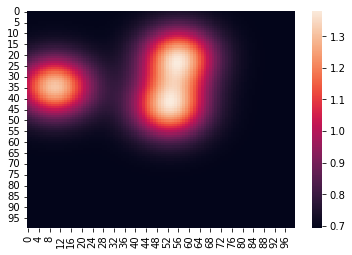

Les deux images sont égales:  False
Somme graphe 1: 7956.079965278435
Somme graphe 1: 7956.15442824787
Somme graphe 1: 7956.079965278435
Somme graphe 2: 7956.15442824787
BCE graphe 1: tensor(68.6589, dtype=torch.float64)
BCE graphe 2: tensor(68.7437, dtype=torch.float64)


In [44]:
center = [(56,21), (10,34.5), (52.3, 43.8)]
sigma = 10

data1 = display_gaussian_image(center, sigma, "logplus")

center = [(56,21), (10,34.5), (52.7, 43.8)]

data2 = display_gaussian_image(center, sigma, "logplus")

print("Les deux images sont égales: ", np.array_equal(data1,data2))

print("Somme graphe 1:", np.sum(data1))
print("Somme graphe 1:", np.sum(data2))

print("Somme graphe 1:", np.sum(data1))
print("Somme graphe 2:", np.sum(data2))

print("BCE graphe 1:", BCEloss(mask_gt_tensor, torch.from_numpy(data1)))
print("BCE graphe 2:", BCEloss(mask_gt_tensor, torch.from_numpy(data2)))